# Música e Saúde Mental

In [26]:
#importando bibliotecas
import pandas as pd 
#biblioteca para construir graficos.
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [10]:
df.shape

(736, 33)

In [20]:
df.columns.to_list()

['Timestamp',
 'Age',
 'Primary streaming service',
 'Hours per day',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'BPM',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Anxiety',
 'Depression',
 'Insomnia',
 'OCD',
 'Music effects',
 'Permissions']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [24]:
# Removendo as colunas 'A' e 'B'
df1=df.copy()
df1= df1.drop(columns=['BPM', 'Timestamp'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   Frequency [Classical]         736 non-null    object 
 10  Frequency [Country]           736 non-null    object 
 11  Frequency [EDM]               736 non-null    object 
 12  Frequency [Folk]              736 non-null    object 
 13  Frequ

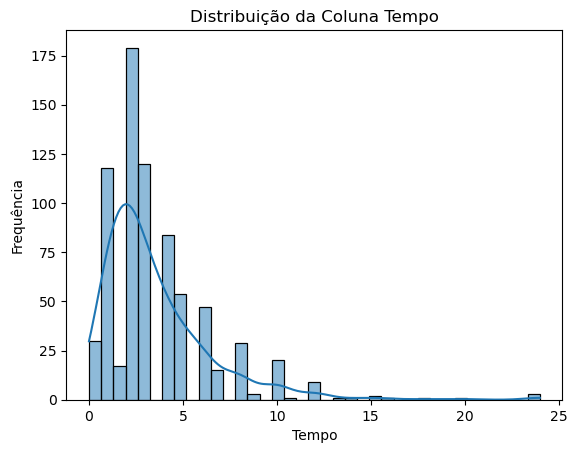

In [30]:
# Criando o gráfico de distribuição
sns.histplot(df1['Hours per day'], kde=True)

# Adicionando título e rótulos
plt.title('Distribuição da Coluna Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


In [32]:
# Contando o número de pessoas com tempo igual a 0
count_zero_tempo = df1[df1['Hours per day'] == 0].shape[0]

print(f'Número de pessoas com tempo igual a 0: {count_zero_tempo}')

Número de pessoas com tempo igual a 0: 6


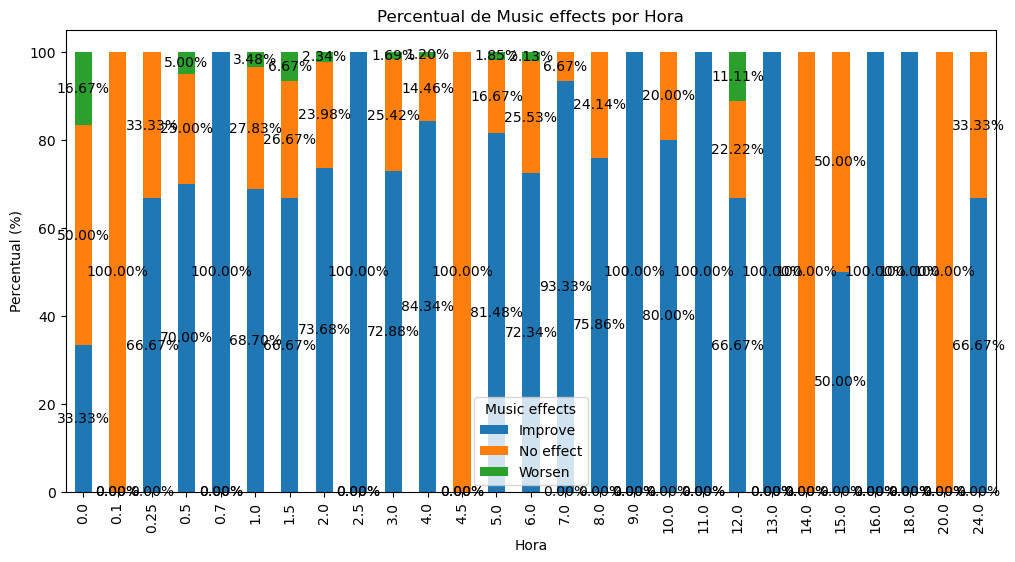

In [43]:
# Contando a frequência de cada string na coluna 'Music effects' por hora
counts = df1.groupby(['Hours per day', 'Music effects']).size().unstack(fill_value=0)

# Calculando os percentuais
percentuals = counts.div(counts.sum(axis=1), axis=0) * 100

# Criando o gráfico de barras com tamanho ajustado
fig, ax = plt.subplots(figsize=(12, 6))  # Ajuste o tamanho conforme necessário

# Plotando cada barra com os percentuais
percentuals.plot(kind='bar', stacked=True, ax=ax)

# Adicionando os percentuais nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

# Adicionando título e rótulos
plt.title('Percentual de Music effects por Hora')
plt.xlabel('Hora')
plt.ylabel('Percentual (%)')

# Exibindo o gráfico
plt.show()